### Importación de datos



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [42]:
#Ingreso total por cada tienda
tiendas = [tienda, tienda2, tienda3, tienda4]
for i, tienda in enumerate(tiendas, start=1):
    ingreso_total = tienda['Precio'].sum()
    print(f'Ingreso total de la Tienda {i}: {ingreso_total}')


Ingreso total de la Tienda 1: 1038375700.0
Ingreso total de la Tienda 2: 1116343500.0
Ingreso total de la Tienda 3: 1098019600.0
Ingreso total de la Tienda 4: 1038375700.0


In [43]:
def ingreso_totales(df):
  x = nombres_tiendas
  y = ingresos_por_tienda

  # Gráfico de barras
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.barh(x, width = y, color=sns.color_palette('viridis', len(x)))
  ax.set_xlabel('Ingreso Total')
  ax.set_title('Ingreso Total por Tienda')
  plt.tight_layout()
  plt.show()


# 2. Ventas por categoría

In [6]:
#Ventas por categoría
for i, df in enumerate(tiendas, start=1):
    print(f'\nCategorías más populares en Tienda {i}:')
    conteo_categorias = df['Categoría del Producto'].value_counts()
    print(conteo_categorias.head(3))

for i, df in enumerate(tiendas, start=1):
  print(f'\nCategorías menos populares en Tienda {i}:')
  conteo_categorias = df['Categoría del Producto'].value_counts()
  print(conteo_categorias.tail(3))


Categorías más populares en Tienda 1:
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

Categorías más populares en Tienda 2:
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

Categorías más populares en Tienda 3:
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

Categorías más populares en Tienda 4:
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64

Categorías menos populares en Tienda 1:
Categoría del Producto
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Categorías menos populares en Tienda 2:
Categoría del Producto
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Categorías menos populares en Tienda 3:
C

In [7]:
import pandas as pd


data_top = []
data_bottom = []

for i, df in enumerate(tiendas, start=1):
    top = df['Categoría del Producto'].value_counts().head(3)
    bottom = df['Categoría del Producto'].value_counts().tail(3)

    for cat, val in top.items():
        data_top.append({'Tienda': f'Tienda {i}', 'Categoría': cat, 'Ventas': val})

    for cat, val in bottom.items():
        data_bottom.append({'Tienda': f'Tienda {i}', 'Categoría': cat, 'Ventas': val})

df_top = pd.DataFrame(data_top)
df_bottom = pd.DataFrame(data_bottom)


In [26]:
def top_3_mas_populares(df):
  plt.figure(figsize=(12, 6))
  sns.barplot(data=df_top, x='Categoría', y='Ventas', hue='Tienda',palette='rocket')
  plt.title('Top 3 Categorías Más Populares por Tienda')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [29]:
def top_menos_populares(df):
  plt.figure(figsize=(12, 6))
  sns.barplot(data=df_bottom, x='Categoría', y='Ventas', hue='Tienda', palette='mako')
  plt.title('Categorías Menos Populares por Tienda')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


# 3. Calificación promedio de la tienda


In [45]:
#Valoración media por tienda
for i, df in enumerate(tiendas, start=1):
    valor_media = df['Calificación'].mean()
    valor_truncado = int(valor_media * 100) / 100
    print(f'Calificación promedio de la tienda {i}: {valor_truncado:.2f}')


Calificación promedio de la tienda 1: 3.99
Calificación promedio de la tienda 2: 4.03
Calificación promedio de la tienda 3: 4.04
Calificación promedio de la tienda 4: 3.99


In [74]:
def valoracion_de_tiendas(df):
  plt.figure(figsize=(10, 6))
  plt.barh(nombres_tiendas, valores_promedio,color=sns.color_palette('icefire'))
  plt.xlabel('Calificación Promedio')
  plt.title('Calificación promedio por tienda')
  plt.xlim(0, 5)  # Asumiendo que la escala es de 1 a 5
  plt.grid(axis='x')
  plt.tight_layout()
  for i, v in enumerate(valores_promedio):
      plt.text(v + 0.05, i, f'{v:.2f}', va='center')
  plt.show()

# 4. Productos más y menos vendidos

In [143]:
#producto más vendido
for i, df in enumerate(tiendas, start=1):
    conteo_productos = df['Producto'].value_counts()
    producto_mas_vendido = conteo_productos.idxmax()
    cantidad_vendida = conteo_productos.max()
    print(f'Producto más vendido en Tienda {i}: {producto_mas_vendido} (vendido {cantidad_vendida} veces)')


Producto más vendido en Tienda 1: Cama box (vendido 62 veces)
Producto más vendido en Tienda 2: Iniciando en programación (vendido 65 veces)
Producto más vendido en Tienda 3: Kit de bancas (vendido 57 veces)
Producto más vendido en Tienda 4: Cama box (vendido 62 veces)


In [142]:
def articulo_mas_vendido(df):
  plt.figure(figsize=(10, 6))
  sns.barplot(x='Tienda', y='Cantidad Vendida', hue='Producto', data=data_mas_vendido, palette='rocket', dodge=False)
  plt.xlabel('Tiendas')
  plt.ylabel('Cantidad vendida ')
  plt.title('Producto Más Vendido por Tienda')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [169]:
#Producto menos vendido
productos_menos_vendidos = []
cantidades = []

for i, df in enumerate(tiendas, start=1):
    conteo_productos = df['Producto'].value_counts()
    producto_menos_vendido = conteo_productos.idxmin()
    cantidad_vendida = conteo_productos.min()
    productos_menos_vendidos.append(f"Tienda {i}: {producto_menos_vendido}")
    cantidades.append(cantidad_vendida)
    print(f'Producto menos vendido en Tienda {i}: {producto_menos_vendido} (vendido {cantidad_vendida} veces)')
def articulo_menos_vendido(df):
  plt.figure(figsize=(10, 6))
  plt.bar(productos_menos_vendidos, cantidades, color=sns.color_palette('mako'))
  plt.xlabel('Producto (por tienda)')
  plt.ylabel('Cantidad Vendida')
  plt.title('Producto menos vendido por tienda')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

Producto menos vendido en Tienda 1: Guitarra eléctrica (vendido 33 veces)
Producto menos vendido en Tienda 2: Juego de mesa (vendido 32 veces)
Producto menos vendido en Tienda 3: Bloques de construcción (vendido 35 veces)
Producto menos vendido en Tienda 4: Guitarra eléctrica (vendido 33 veces)


# 5. Envío promedio por tienda

In [163]:
#valor promedio del envio
nombres_tiendas = []
costos_promedio = []
for i, df in enumerate(tiendas, start=1):
    envio_promedio = df['Costo de envío'].mean()
    nombres_tiendas.append(f'Tienda {i}')
    costos_promedio.append(envio_promedio)

    print(f'Costo de envío promedio de la Tienda {i}: {envio_promedio:.2f}')

Costo de envío promedio de la Tienda 1: 23459.46
Costo de envío promedio de la Tienda 2: 25216.24
Costo de envío promedio de la Tienda 3: 24805.68
Costo de envío promedio de la Tienda 4: 23459.46


In [173]:
#Gráfico
def grafico_envio(df):
  plt.figure(figsize=(8, 5))
  plt.bar(nombres_tiendas, costos_promedio, color=sns.color_palette('icefire'))
  plt.xlabel('Tienda')
  plt.ylabel('Costo de Envío Promedio')
  plt.title('Costo de Envío Promedio por Tienda')
  plt.ylim(0, max(costos_promedio) * 1.1)
  plt.grid(axis='y', linestyle='--', alpha=0.6)
  plt.tight_layout()
  plt.show()

# Gráficos

Adicional al analisis se realizó una serie de gráficos para ayudarle al señor juan a visualizar:
*   Lugares de compra indicados en el mapa
*   Ventas por vendedor
*   Preferencia de pago
*   Precio vs calificación

Se deja a su dispocision futuras decisiones



In [ ]:
#Mapa de Calor de Latitud y Longitud
import plotly.express as px
df = pd.concat([pd.read_csv(url1), pd.read_csv(url2), pd.read_csv(url3), pd.read_csv(url4)], ignore_index=True)


fig = px.density_mapbox(df, lat='lat', lon='lon', radius=20,
                        center=dict(lat=4.5709, lon=-74.2973), zoom=5,
                        mapbox_style="open-street-map")

fig.update_layout(title="Lugar de compra ")
fig.show()



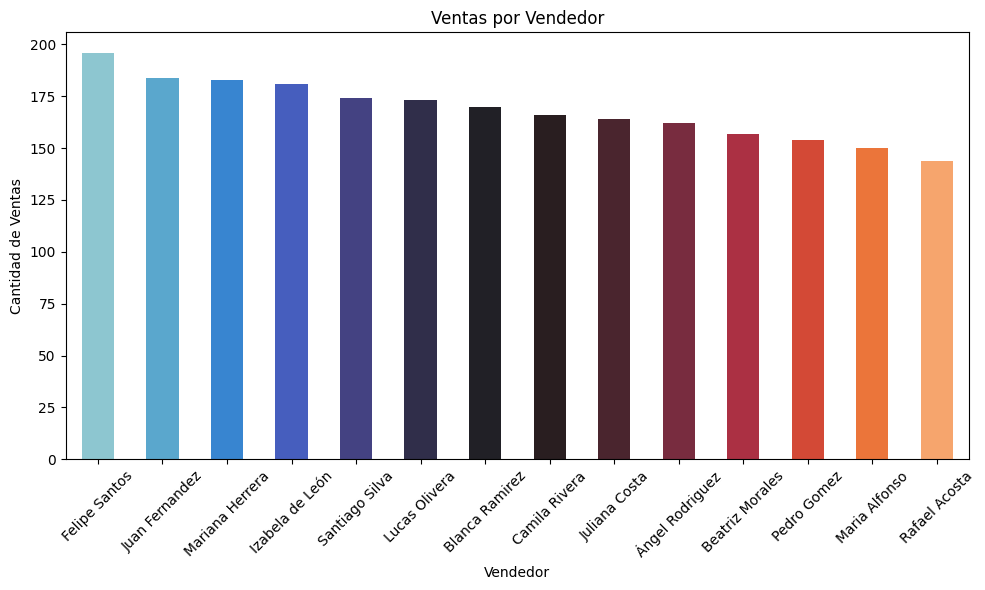

In [ ]:
#Gráfico de barras de ventas por vendedor
vendedores = df['Vendedor'].value_counts()

colores = sns.color_palette('icefire', len(vendedores))
plt.figure(figsize=(10, 6))
vendedores.plot(kind='bar', color=colores)
plt.title('Ventas por Vendedor')
plt.xlabel('Vendedor')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

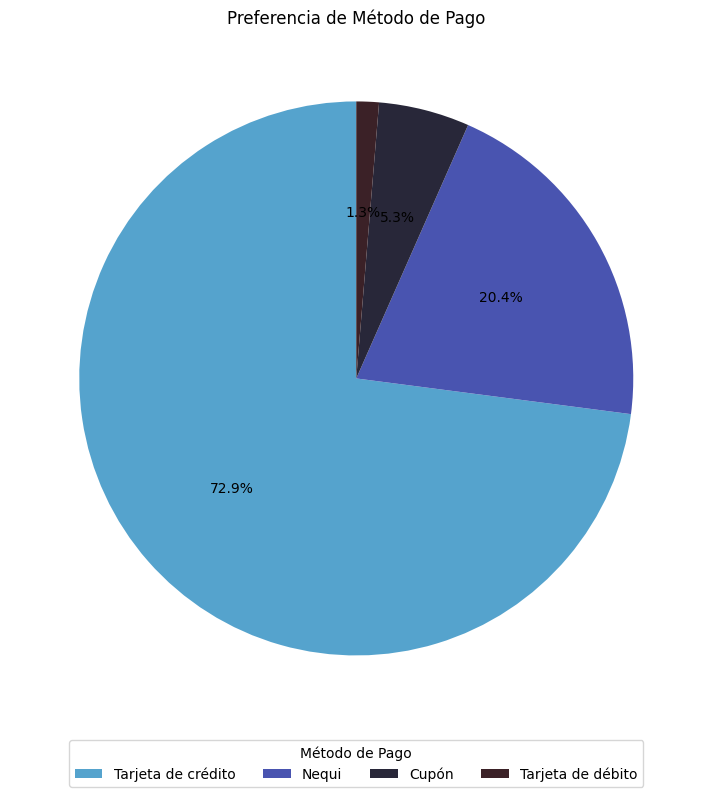

In [ ]:
#Gráfico de pastel preferencia de metodos de pago
metodos_pago = df['Método de pago'].value_counts()
colors = sns.color_palette('icefire')[0:len(metodos_pago)]

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    metodos_pago,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)

ax.legend(
    wedges,
    metodos_pago.index,
    title="Método de Pago",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=4
)

plt.title('Preferencia de Método de Pago')
plt.tight_layout()
plt.show()


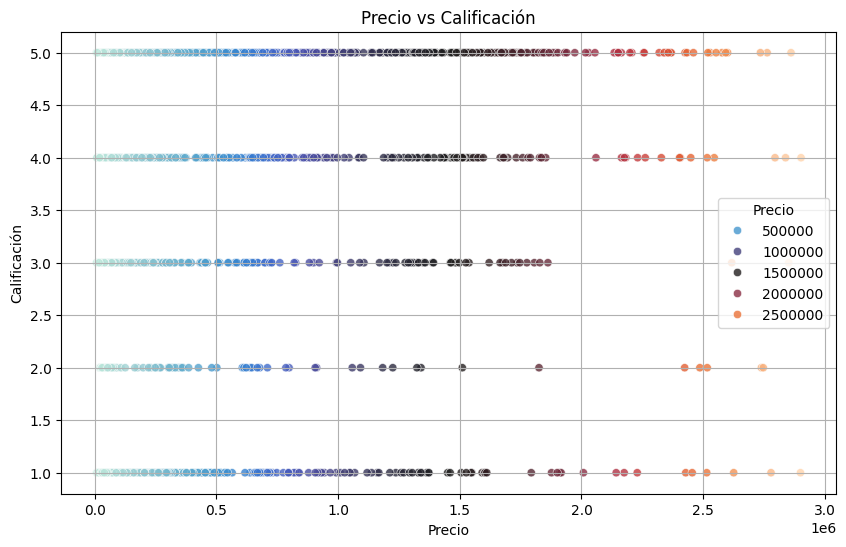

In [ ]:
#Gráfico de disperción
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=tienda,
    x='Precio',
    y='Calificación',
    hue='Precio',
    palette='icefire',
    alpha=0.8,
    legend=True
)
plt.title('Precio vs Calificación')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()



# **Informe final**

-----
**Objetivo del análisis:**

Determinar cuál de las cuatro tiendas de la cadena Alura Store presenta menor eficiencia operativa y comercial, con el fin de recomendar al Sr. Juan cuál debería vender para dar inicio a un nuevo emprendimiento.

**De indicadores clave por tienda**

**Los ingresos totales de las tiendas son los siguientes:**

* Tienda 1: 1,150,880,400.0 *(Mil ciento cincuenta millones ochocientos ochenta mil cuatrocientos)*
*Tienda 2: 1,116,343,500.0 *( Mil ciento dieciséis millones trescientos cuarenta y tres mil quinientos.)*
*Tienda 3: 1,098,019,600.0 *(Mil noveta y ocho millones diecinueve mil seiscientos)*
*Tienda 4: 1,038,375,700.0 *(Mil treinta y ocho millones trescientos setenta y cinco mil setecientos)*

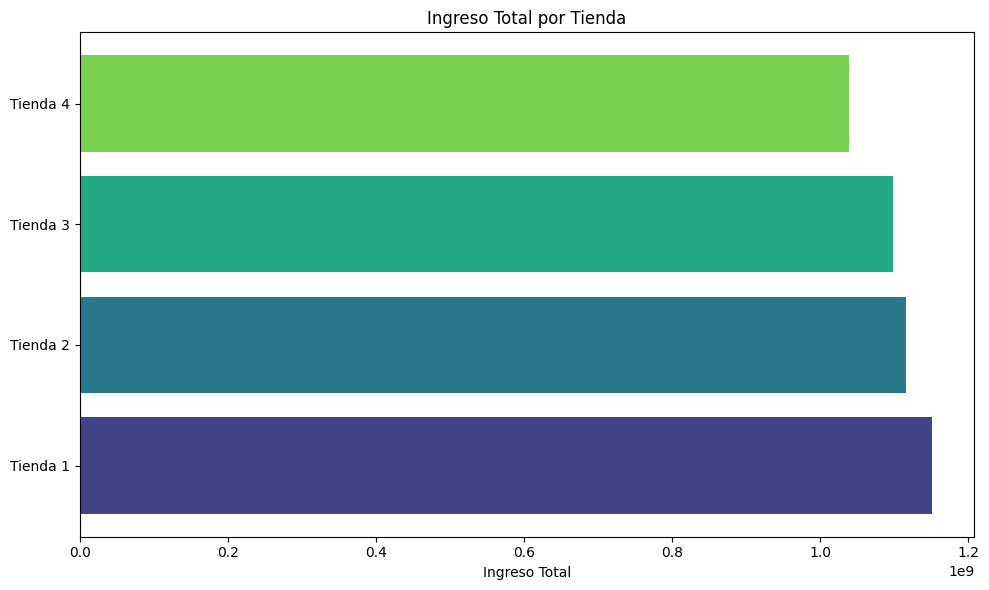

In [44]:
ingreso_totales(df)

**Las categorías de productos más y menos vendidas**

*Dentro de los articulos más vendidos podemos encontrar en las categorías de:*
* muebles
* electronicos
* juguetes

*Mientras que los articulos menos vendidos se encuentran dentro de las catergorías:*
* Instrumentos musicales
* libros
* Artículos para el hogar


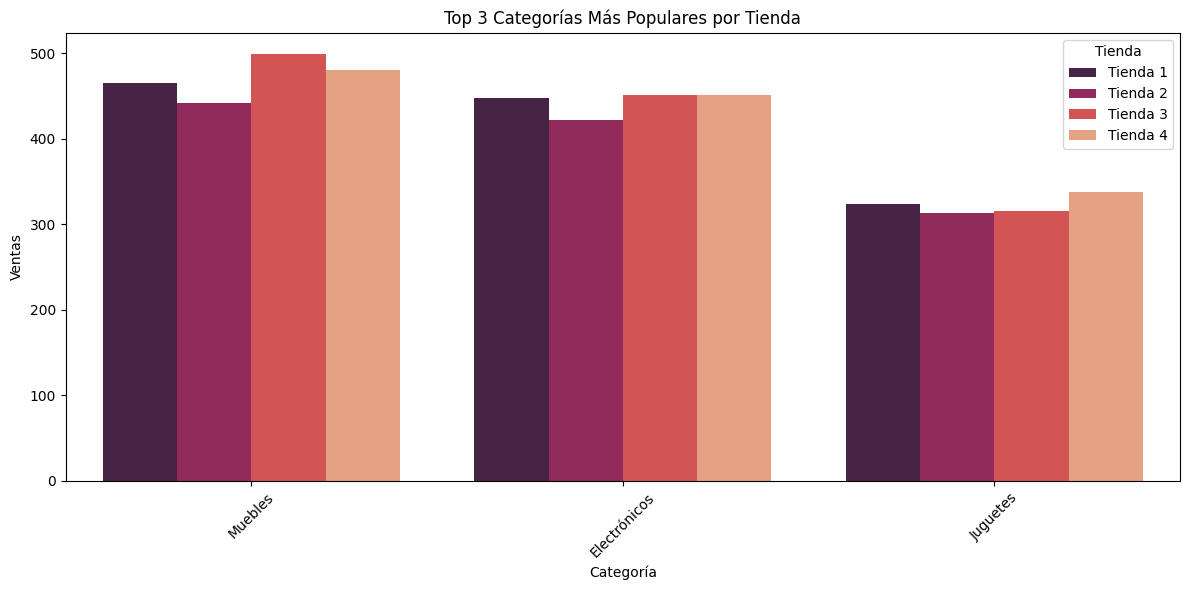

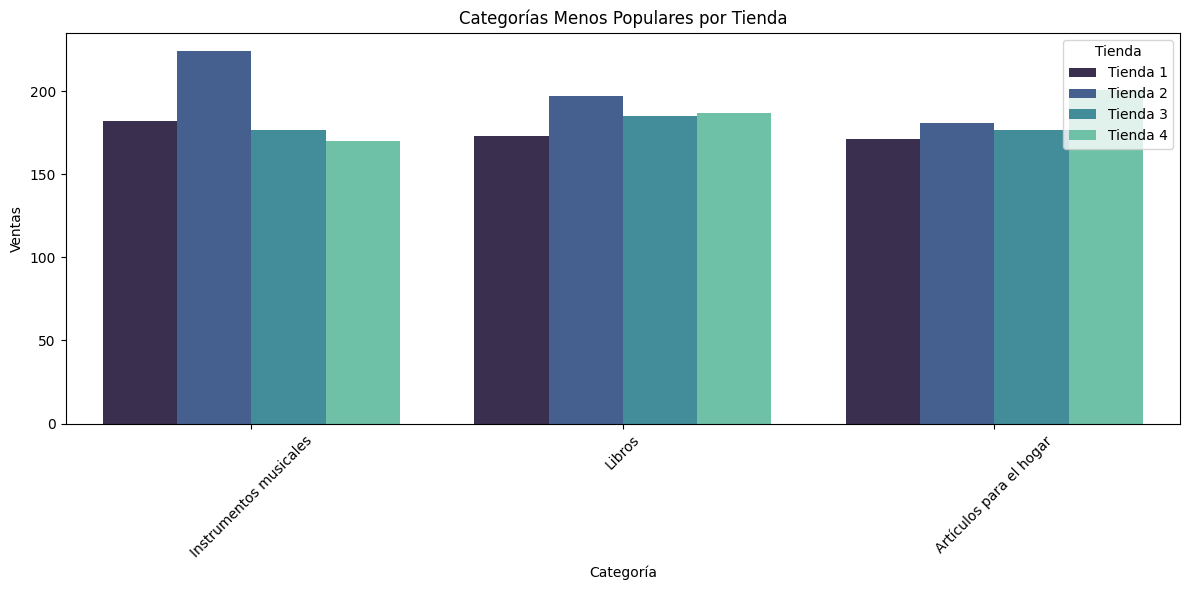

In [30]:
top_3_mas_populares(df)
top_menos_populares(df)


**Las calificaciones promedio de los clientes por tienda.**

Los clientes han calificado a las tiendas cuyos promedios rondan en:
* *La tienda 1 tiene una calificación de 3.97 de 5*
* *La tienda 2 cuenta con una calificación de 4.03 de 5*
* *Por su parte la tienda 3 su calificación es de 4.04 de 5*
* *Mientras tanto la tienda numero 4 tiene una calificacion de 3.99 de 5*

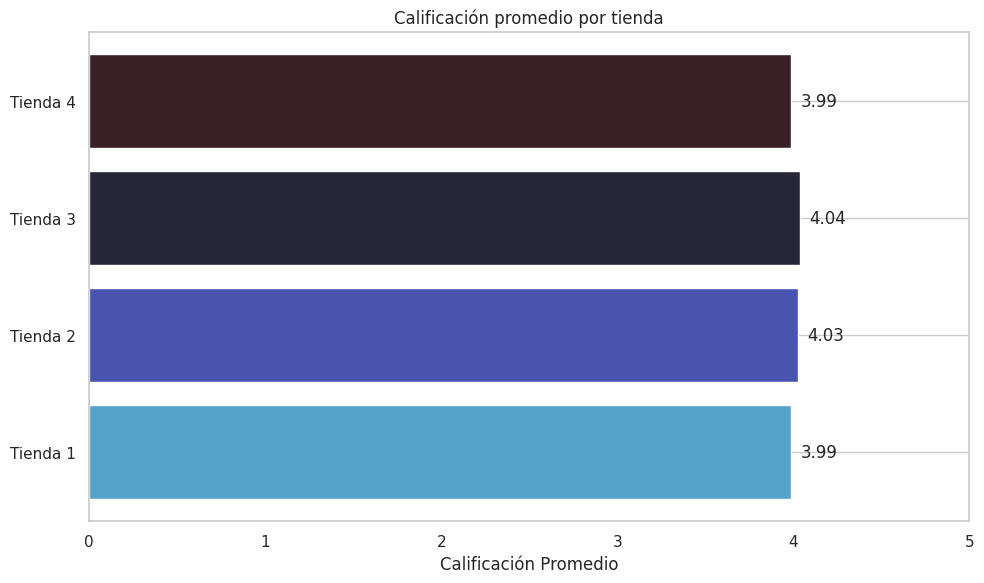

In [75]:
valoracion_de_tiendas(df)

**Los productos más y menos vendidos.**

Dentro del análisis se logró detectar que los productos más vendidos en las tiendas fueron
* En la tienda 1 el producto más vendido fue el *microondas*, mientras el producto mebos vendido fueron los *Auriculares con micrófono*.

* En el caso de la tienda 2, el producto *Iniciando en programación* fué el más vendido, y el *Juego de mesa* el menos vendido.

* Dentro de la tienda 3, el producto más popular fue *Kit de bancas*, y el producto menos popular resulto ser *Bloques de construcción*

* Finalmente la tienda 4 presentó su producto más vendido la *cama box*, siendo el menos vendido la *guitarra electrica*

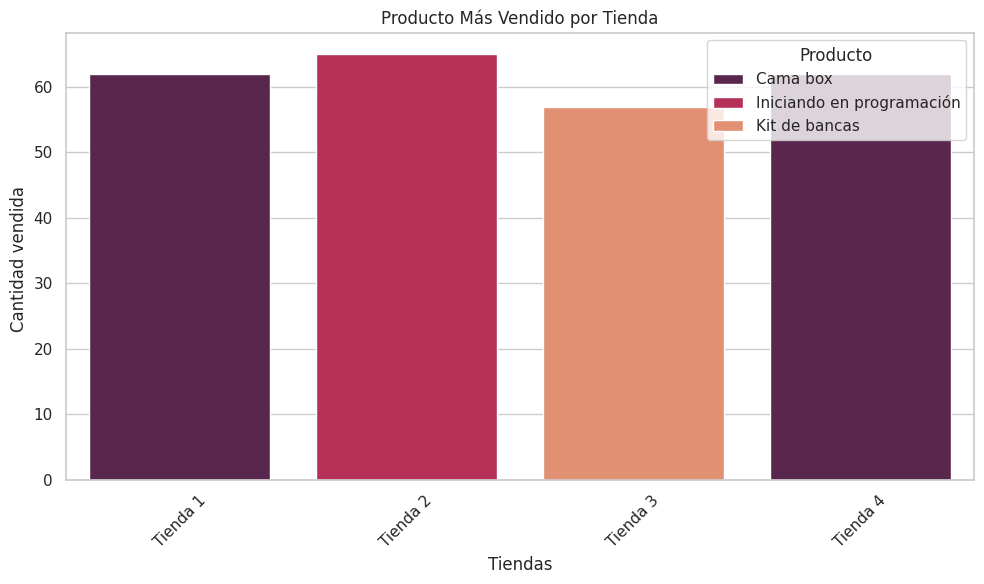

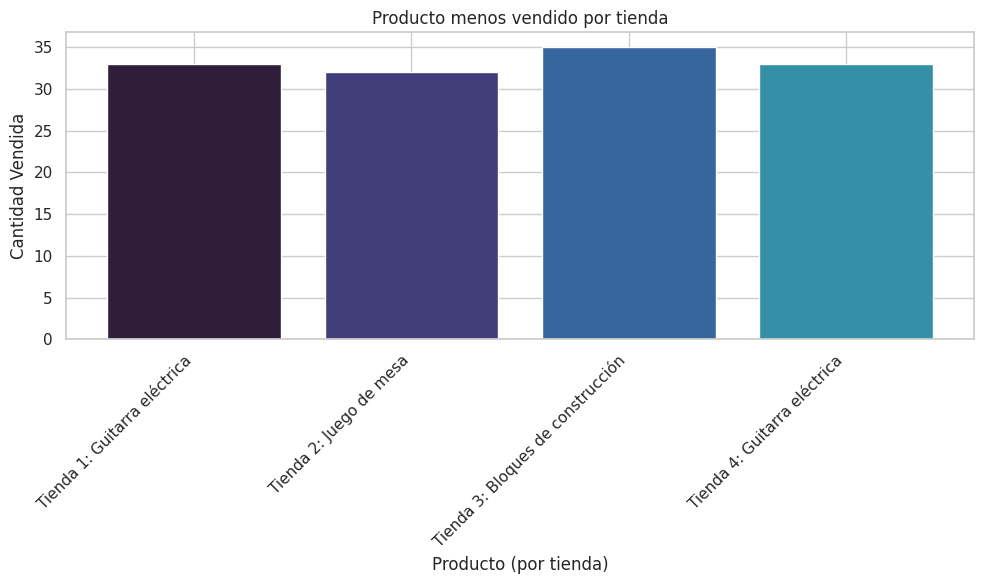

In [170]:
articulo_mas_vendido(df)
articulo_menos_vendido(df)





**El coste de envío promedio para cada tienda.**

En el coste de envío promedio para cada tienda nos podemos percatar que la tienda 1, su costo es : 26,018.61 *(veintiséis mil dieciocho punto sesanta y uno)*

en la tienda 2 su coste ascendió a 25,216.24 *(veinticinco mil doscientos dieciséis punto veinticuatro)*

por su parte la tienda 3, reportó un coste de 24,805.68 *(veinticuatro mil ochocientos cinco punto sesanta y ocho)*

por ultimó la tienda 4 sus costes de envió resultaron en 23,459.46 *(veintitres mil cuatrocientos cincuenta y nueve punto cuarenta y seis)*



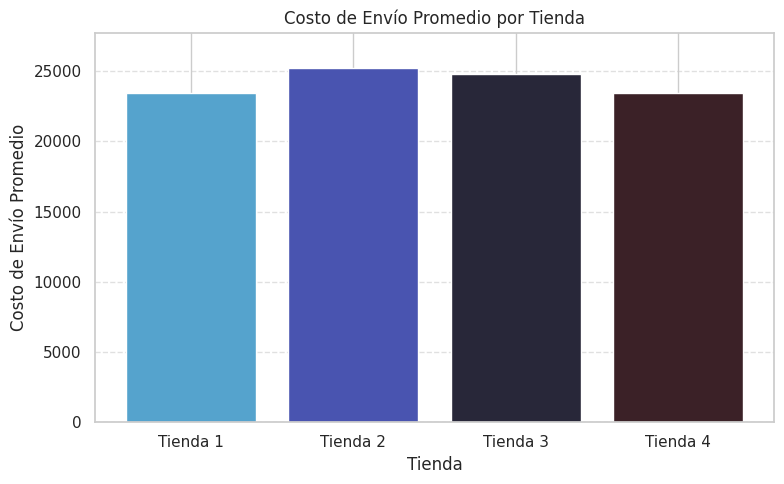

In [174]:
grafico_envio(df)



---


**Conclusión**

Tras el análisis de los datos disponibles, se concluye que la Tienda 4 es la menos eficiente dentro de la cadena Alura Store. A pesar de contar con el menor costo de envío, su bajo nivel de ingresos y desempeño promedio en satisfacción del cliente indican un bajo rendimiento general.

Se recomienda vender la Tienda 4, ya que representa la opción menos rentable dentro del portafolio actual y su rendimiento no compensa con ventajas competitivas destacadas.


